In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets


In [ ]:
 input_size = 28*28 
 hidden_layer_1_size = 500
 hidden_layer_2_size = 500 
 output_size = 10
 epochs = 250
 batch_size = 64
 learning_rate = 0.01 

In [ ]:
#Extracting MNIST data and Normalising it
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

training = datasets.MNIST("", train=True, download = True,transform= transform)
testing =  datasets.MNIST("", train=False, download = True,transform= transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#training_set, validation_set and testing_set
train, val = torch.utils.data.random_split(training, [50000, 10000])
print("Number of images in Training set: ",len(train))
print("Number of images in Validation set: ",len(val))
print("Number of images in Testing set: ",len(testing))


Number of images in Training set:  50000
Number of images in Validation set:  10000
Number of images in Testing set:  10000


In [ ]:
train_set = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
validation_set = torch.utils.data.DataLoader(val, batch_size=batch_size, shuffle=False)
test_set = torch.utils.data.DataLoader(testing, batch_size=batch_size, shuffle=False)

In [ ]:
#Neural Network
import torch.nn as nn
model = nn.Sequential(nn.Linear(input_size, hidden_layer_1_size), 
                      nn.ReLU(),
                      nn.Linear(hidden_layer_1_size, hidden_layer_2_size),
                      nn.ReLU(),
                      nn.Linear(hidden_layer_2_size, output_size),
                      nn.LogSoftmax(dim=1))


In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=learning_rate) 

criterion=nn.CrossEntropyLoss()

In [ ]:
import numpy as np
# trainingloss=np.zeros(epochs)
# trainingaccuracy=np.zeros(epochs)
# validationloss=np.zeros(epochs)
# validationaccuracy=np.zeros(epochs)

# x_axis=np.zeros(epochs)

# for epoch in range(epochs):
#   ####################
#   ### Train Loop #####
#   ####################
  
#   model.train()
#   train_loss=0
#   for data in train_set:
#     X,Y=data
#     X=X.view(-1,28*28)
#     optimizer.zero_grad()
#     outputs=model(X)
#     loss=criterion(outputs,Y)
#     loss.backward()
#     optimizer.step()
#     train_loss += loss.item()
#   trainingloss[epoch]=train_loss/len(train_set)

#   #########################
#   ### Validation Loop #####
#   #########################
#   model.eval()
#   valid_loss = 0
#   for data in validation_set:
#     X,Y=data
#     X=X.view(-1,28*28)
#     outputs=model(X)
#     loss = criterion(outputs,Y)
#     valid_loss += loss.item()
#   validationloss[epoch]=valid_loss/len(validation_set)

#   #validation accuracy
#   correct = 0
#   total = 0
#   for data in validation_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     output = model(X)
#     _,predicted=torch.max(output.data, 1)
#     total += Y.size(0)
#     correct += (predicted == Y).sum()
#   vaccuracy = 100 * correct / total
#   validationaccuracy[epoch]=vaccuracy.item()

#   # Training Accuracy
#   correct = 0
#   total = 0
#   for data in train_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     output = model(X)
#     _,predicted=torch.max(output.data, 1)
#     total += Y.size(0)
#     correct += (predicted == Y).sum()
#   taccuracy = 100 * correct / total
#   trainingaccuracy[epoch]=taccuracy.item()

#   x_axis[epoch]=epoch+1

#   print("Epoch:",epoch+1,"  Trainloss: ",trainingloss[epoch],"  TrainAccuracy: ",trainingaccuracy[epoch],"  ValidationLoss: ",validationloss[epoch],"  ValidationAccuracy: ",validationaccuracy[epoch])


In [ ]:
# # Ploting the error and classification accuracy on both training and validation data over the epochs
# import matplotlib.pyplot as plt
# plt.figure()
# plt.title(" Training Error  Vs Number of Epochs")
# plt.ylabel("Training Error")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,trainingloss)

# plt.figure()
# plt.title(" Training Accuracy  Vs Number of Epochs")
# plt.ylabel("Training Accuracy")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,trainingaccuracy)

# plt.figure()
# plt.title(" Validation Error  Vs Number of Epochs")
# plt.ylabel("Validation Error")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,validationloss)

# plt.figure()
# plt.title(" Validation Accuracy  Vs Number of Epochs")
# plt.ylabel("Validation Accuracy")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,validationaccuracy)



In [ ]:
# # Training Accuracy
# correct = 0
# total = 0
# with torch.no_grad():
#   for data in train_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     output = model(X)
#     _,predicted=torch.max(output.data, 1)
#     total += Y.size(0)
#     correct += (predicted == Y).sum()
# training_accuracy = 100 * correct / total


# # Testing Accuracy
# correct = 0
# total = 0
# with torch.no_grad():
#   for data in test_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     output = model(X)
#     _,predicted=torch.max(output.data, 1)
#     total += Y.size(0)
#     correct += (predicted == Y).sum()

# testing_accuracy = 100 * correct / total

# print("Training Accuracy: ",training_accuracy.item())
# print("Testing Accuracy: ",testing_accuracy.item())

## L2 Regularization 

In [ ]:

weight_decay=0.01

lmodel = nn.Sequential(nn.Linear(input_size, hidden_layer_1_size), 
                      nn.ReLU(),
                      nn.Linear(hidden_layer_1_size, hidden_layer_2_size),
                      nn.ReLU(),
                      nn.Linear(hidden_layer_2_size, output_size),
                      nn.LogSoftmax(dim=1))
loptimizer = optim.SGD(lmodel.parameters(), lr=learning_rate, weight_decay=weight_decay)

ltrainingloss=np.zeros(epochs)
ltrainingaccuracy=np.zeros(epochs)
lvalidationloss=np.zeros(epochs)
lvalidationaccuracy=np.zeros(epochs)

for epoch in range(epochs):
  ####################
  ### Train Loop #####
  ####################
  
  lmodel.train()
  ltrain_loss=0
  for data in train_set:
    X,Y=data
    X=X.view(-1,28*28)
    loptimizer.zero_grad()
    loutputs=lmodel(X)
    lloss=criterion(loutputs,Y)
    lloss.backward()
    loptimizer.step()
    ltrain_loss += lloss.item()
  ltrainingloss[epoch]=ltrain_loss/len(train_set)

  #########################
  ### Validation Loop #####
  #########################
  lmodel.eval()
  lvalid_loss = 0
  for data in validation_set:
    X,Y=data
    X=X.view(-1,28*28)
    loutputs=lmodel(X)
    lloss = criterion(loutputs,Y)
    lvalid_loss += lloss.item()
  lvalidationloss[epoch]=lvalid_loss/len(validation_set)

  #validation accuracy
  lcorrect = 0
  ltotal = 0
  for data in validation_set:
    X, Y = data
    X=X.view(-1,28*28)
    loutput = lmodel(X)
    _,lpredicted=torch.max(loutput.data, 1)
    ltotal += Y.size(0)
    lcorrect += (lpredicted == Y).sum()
  laccuracy = 100 * lcorrect / ltotal
  lvalidationaccuracy[epoch]=laccuracy.item()

  # Training Accuracy
  lcorrect = 0
  ltotal = 0
  for data in train_set:
    X, Y = data
    X=X.view(-1,28*28)
    loutput = lmodel(X)
    _,lpredicted=torch.max(loutput.data, 1)
    ltotal += Y.size(0)
    lcorrect += (lpredicted == Y).sum()
  ltaccuracy = 100 * lcorrect / ltotal
  ltrainingaccuracy[epoch]=ltaccuracy.item()

  print("Epoch:",epoch+1,"  Trainloss: ",ltrainingloss[epoch],"  TrainAccuracy: ",ltrainingaccuracy[epoch],"  ValidationLoss: ",lvalidationloss[epoch],"  ValidationAccuracy: ",lvalidationaccuracy[epoch])


Epoch: 1   Trainloss:  1.0117506798347244   TrainAccuracy:  87.08599853515625   ValidationLoss:  0.47844989483903166   ValidationAccuracy:  86.91000366210938
Epoch: 2   Trainloss:  0.4032241596132898   TrainAccuracy:  89.40399932861328   ValidationLoss:  0.3773533525360618   ValidationAccuracy:  89.41999816894531
Epoch: 3   Trainloss:  0.34635591943321936   TrainAccuracy:  88.67400360107422   ValidationLoss:  0.3823612917950199   ValidationAccuracy:  88.0999984741211
Epoch: 4   Trainloss:  0.321316864303387   TrainAccuracy:  90.31999969482422   ValidationLoss:  0.3455474176414453   ValidationAccuracy:  89.80999755859375
Epoch: 5   Trainloss:  0.30385585021599176   TrainAccuracy:  90.82599639892578   ValidationLoss:  0.3241478223234985   ValidationAccuracy:  90.48999786376953
Epoch: 6   Trainloss:  0.2903483358147504   TrainAccuracy:  92.21399688720703   ValidationLoss:  0.29132845466303975   ValidationAccuracy:  91.83999633789062
Epoch: 7   Trainloss:  0.27827930980173826   TrainAccura

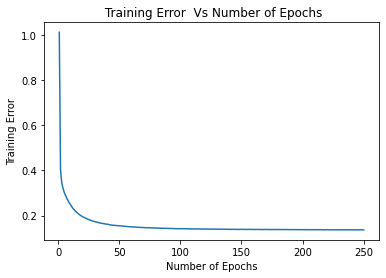

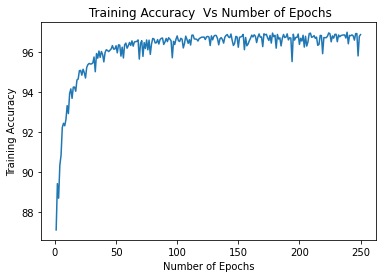

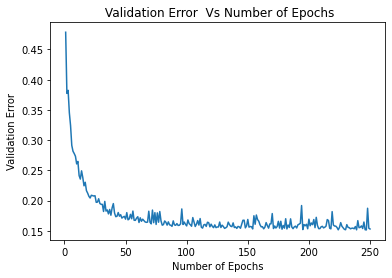

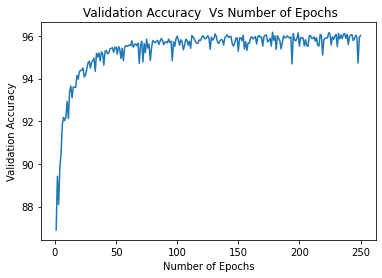

In [ ]:
x_axis = np.arange(start=1, stop=epochs+1, step=1)
# Ploting the error and classification accuracy on both training and validation data over the epochs
import matplotlib.pyplot as plt
plt.figure()
plt.title(" Training Error  Vs Number of Epochs")
plt.ylabel("Training Error")
plt.xlabel("Number of Epochs")
plt.plot(x_axis,ltrainingloss)

plt.figure()
plt.title(" Training Accuracy  Vs Number of Epochs")
plt.ylabel("Training Accuracy")
plt.xlabel("Number of Epochs")
plt.plot(x_axis,ltrainingaccuracy)

plt.figure()
plt.title(" Validation Error  Vs Number of Epochs")
plt.ylabel("Validation Error")
plt.xlabel("Number of Epochs")
plt.plot(x_axis,lvalidationloss)

plt.figure()
plt.title(" Validation Accuracy  Vs Number of Epochs")
plt.ylabel("Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.plot(x_axis,lvalidationaccuracy)


In [ ]:
# Training Accuracy
lcorrect = 0
ltotal = 0
with torch.no_grad():
  for data in train_set:
    X, Y = data
    X=X.view(-1,28*28)
    loutput = lmodel(X)
    _,lpredicted=torch.max(loutput.data, 1)
    ltotal += Y.size(0)
    lcorrect += (lpredicted == Y).sum()
ltraining_accuracy = 100 * lcorrect / ltotal


# Testing Accuracy
lcorrect = 0
ltotal = 0
with torch.no_grad():
  for data in test_set:
    X, Y = data
    X=X.view(-1,28*28)
    loutput = lmodel(X)
    _,lpredicted=torch.max(loutput.data, 1)
    ltotal += Y.size(0)
    lcorrect += (lpredicted == Y).sum()

ltesting_accuracy = 100 * lcorrect / ltotal

print("Training Accuracy: ",ltraining_accuracy.item())
print("Testing Accuracy: ",ltesting_accuracy.item())

Training Accuracy:  96.86599731445312
Testing Accuracy:  96.54000091552734


## Dropout


In [ ]:
# dmodel = nn.Sequential(nn.Linear(input_size, hidden_layer_1_size), 
#                       nn.ReLU(),
#                       nn.Dropout(p=0.5),
#                       nn.Linear(hidden_layer_1_size, hidden_layer_2_size),
#                       nn.ReLU(),
#                       nn.Dropout(p=0.5),
#                       nn.Linear(hidden_layer_2_size, output_size),
#                       nn.LogSoftmax(dim=1))
# doptimizer = optim.SGD(dmodel.parameters(), lr=learning_rate)

# dtrainingloss=np.zeros(epochs)
# dtrainingaccuracy=np.zeros(epochs)
# dvalidationloss=np.zeros(epochs)
# dvalidationaccuracy=np.zeros(epochs)

# for epoch in range(epochs):
#   ####################
#   ### Train Loop #####
#   ####################
  
#   dmodel.train()
#   dtrain_loss=0
#   for data in train_set:
#     X,Y=data
#     X=X.view(-1,28*28)
#     doptimizer.zero_grad()
#     doutputs=dmodel(X)
#     dloss=criterion(doutputs,Y)
#     dloss.backward()
#     doptimizer.step()
#     dtrain_loss += dloss.item()
#   dtrainingloss[epoch]=dtrain_loss/len(train_set)

#   #########################
#   ### Validation Loop #####
#   #########################
#   dmodel.eval()
#   dvalid_loss = 0
#   for data in validation_set:
#     X,Y=data
#     X=X.view(-1,28*28)
#     doutputs=dmodel(X)
#     dloss = criterion(doutputs,Y)
#     dvalid_loss += dloss.item()
#   dvalidationloss[epoch]=dvalid_loss/len(validation_set)

#   #validation accuracy
#   dcorrect = 0
#   dtotal = 0
#   for data in validation_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     doutput = dmodel(X)
#     _,dpredicted=torch.max(doutput.data, 1)
#     dtotal += Y.size(0)
#     dcorrect += (dpredicted == Y).sum()
#   daccuracy = 100 * dcorrect / dtotal
#   dvalidationaccuracy[epoch]=daccuracy.item()

#   # Training Accuracy
#   dcorrect = 0
#   dtotal = 0
#   for data in train_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     doutput = dmodel(X)
#     _,dpredicted=torch.max(doutput.data, 1)
#     dtotal += Y.size(0)
#     dcorrect += (dpredicted == Y).sum()
#   dtaccuracy = 100 * dcorrect / dtotal
#   dtrainingaccuracy[epoch]=dtaccuracy.item()

#   print("Epoch:",epoch+1,"  Trainloss: ",dtrainingloss[epoch],"  TrainAccuracy: ",dtrainingaccuracy[epoch],"  ValidationLoss: ",dvalidationloss[epoch],"  ValidationAccuracy: ",dvalidationaccuracy[epoch])


In [ ]:
# # Ploting the error and classification accuracy on both training and validation data over the epochs
# import matplotlib.pyplot as plt
# plt.figure()
# plt.title(" Training Error  Vs Number of Epochs")
# plt.ylabel("Training Error")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,dtrainingloss)

# plt.figure()
# plt.title(" Training Accuracy  Vs Number of Epochs")
# plt.ylabel("Training Accuracy")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,dtrainingaccuracy)

# plt.figure()
# plt.title(" Validation Error  Vs Number of Epochs")
# plt.ylabel("Validation Error")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,dvalidationloss)

# plt.figure()
# plt.title(" Validation Accuracy  Vs Number of Epochs")
# plt.ylabel("Validation Accuracy")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis,dvalidationaccuracy)


In [ ]:
# # Training Accuracy
# dcorrect = 0
# dtotal = 0
# with torch.no_grad():
#   for data in train_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     doutput = dmodel(X)
#     _,dpredicted=torch.max(doutput.data, 1)
#     dtotal += Y.size(0)
#     dcorrect += (dpredicted == Y).sum()
# dtraining_accuracy = 100 * dcorrect / dtotal


# # Testing Accuracy
# dcorrect = 0
# dtotal = 0
# with torch.no_grad():
#   for data in test_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     doutput = dmodel(X)
#     _,dpredicted=torch.max(doutput.data, 1)
#     dtotal += Y.size(0)
#     dcorrect += (dpredicted == Y).sum()

# dtesting_accuracy = 100 * dcorrect / dtotal

# print("Training Accuracy: ",dtraining_accuracy.item())
# print("Testing Accuracy: ",dtesting_accuracy.item())

## Early Stopping

In [ ]:

# emodel = nn.Sequential(nn.Linear(input_size, hidden_layer_1_size), 
#                       nn.ReLU(),
#                       nn.Linear(hidden_layer_1_size, hidden_layer_2_size),
#                       nn.ReLU(),
#                       nn.Linear(hidden_layer_2_size, output_size),
#                       nn.LogSoftmax(dim=1))
# eoptimizer = optim.SGD(emodel.parameters(), lr=learning_rate)

# etrainingloss=np.zeros(epochs)
# etrainingaccuracy=np.zeros(epochs)
# evalidationloss=np.zeros(epochs)
# evalidationaccuracy=np.zeros(epochs)

# best_accuracy=0
# bestepoch=0
# for epoch in range(epochs):
#   ####################
#   ### Train Loop #####
#   ####################
  
#   emodel.train()
#   etrain_loss=0
#   for data in train_set:
#     X,Y=data
#     X=X.view(-1,28*28)
#     eoptimizer.zero_grad()
#     eoutputs=emodel(X)
#     eloss=criterion(eoutputs,Y)
#     eloss.backward()
#     eoptimizer.step()
#     etrain_loss += eloss.item()
#   etrainingloss[epoch]=etrain_loss/len(train_set)

#   #########################
#   ### Validation Loop #####
#   #########################
#   emodel.eval()
#   evalid_loss = 0
#   for data in validation_set:
#     X,Y=data
#     X=X.view(-1,28*28)
#     eoutputs=emodel(X)
#     eloss = criterion(eoutputs,Y)
#     evalid_loss += eloss.item()
#   evalidationloss[epoch]=evalid_loss/len(validation_set)

#   #validation accuracy
#   ecorrect = 0
#   etotal = 0
#   for data in validation_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     eoutput = emodel(X)
#     _,epredicted=torch.max(eoutput.data, 1)
#     etotal += Y.size(0)
#     ecorrect += (epredicted == Y).sum()
#   eaccuracy = 100 * ecorrect / etotal
#   evalidationaccuracy[epoch]=eaccuracy.item()

#   # Training Accuracy
#   ecorrect = 0
#   etotal = 0
#   for data in train_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     eoutput = emodel(X)
#     _,epredicted=torch.max(eoutput.data, 1)
#     etotal += Y.size(0)
#     ecorrect += (epredicted == Y).sum()
#   etaccuracy = 100 * ecorrect / etotal
#   etrainingaccuracy[epoch]=etaccuracy.item()

#   if evalidationaccuracy[epoch] > best_accuracy:
#     best_accuracy = evalidationloss[epoch]
#     bestepoch=epoch
#     torch.save(emodel, 'best_model')

#   print("Epoch:",epoch+1,"  Trainloss: ",etrainingloss[epoch],"  TrainAccuracy: ",etrainingaccuracy[epoch],"  ValidationLoss: ",evalidationloss[epoch],"  ValidationAccuracy: ",evalidationaccuracy[epoch])

# print("Optimal number of Epoch for early stopping: ",bestepoch+1)
# emodel = torch.load('best_model')
# emodel.eval()


In [ ]:
# # Ploting the error and classification accuracy on both training and validation data over the epochs
# import matplotlib.pyplot as plt
# plt.figure()
# plt.title(" Training Error  Vs Number of Epochs")
# plt.ylabel("Training Error")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis[:bestepoch],etrainingloss[:bestepoch])

# plt.figure()
# plt.title(" Training Accuracy  Vs Number of Epochs")
# plt.ylabel("Training Accuracy")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis[:bestepoch],etrainingaccuracy[:bestepoch])

# plt.figure()
# plt.title(" Validation Error  Vs Number of Epochs")
# plt.ylabel("Validation Error")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis[:bestepoch],evalidationloss[:bestepoch])

# plt.figure()
# plt.title(" Validation Accuracy  Vs Number of Epochs")
# plt.ylabel("Validation Accuracy")
# plt.xlabel("Number of Epochs")
# plt.plot(x_axis[:bestepoch],evalidationaccuracy[:bestepoch])


In [ ]:
# # Training Accuracy
# ecorrect = 0
# etotal = 0
# with torch.no_grad():
#   for data in train_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     eoutput = emodel(X)
#     _,epredicted=torch.max(eoutput.data, 1)
#     etotal += Y.size(0)
#     ecorrect += (epredicted == Y).sum()
# etraining_accuracy = 100 * ecorrect / etotal


# # Testing Accuracy
# ecorrect = 0
# etotal = 0
# with torch.no_grad():
#   for data in test_set:
#     X, Y = data
#     X=X.view(-1,28*28)
#     eoutput = emodel(X)
#     _,epredicted=torch.max(eoutput.data, 1)
#     etotal += Y.size(0)
#     ecorrect += (epredicted == Y).sum()

# etesting_accuracy = 100 * ecorrect / etotal

# print("Training Accuracy: ",etraining_accuracy.item())
# print("Testing Accuracy: ",etesting_accuracy.item())